In [15]:
from pathlib import Path

import os
import sys

sys.path.append(str(Path.cwd() / ".." / "scripts"))

from _helpers import progress_retrieve

In [16]:
# url = "https://zenodo.org/record/3884859"
# download_url = "https://zenodo.org/record/3884859/files/espeni.csv?download=1"
download_url = "https://zenodo.org/record/3884859/files/espeni.csv"

target = Path.cwd() / "espeni.csv"

progress_retrieve(download_url, target, disable=False)


0.00B [00:00, ?B/s]

33.5MB [00:24, 1.46MB/s]                              


In [17]:
import pandas as pd

df = pd.read_csv(target, index_col=2, parse_dates=True)


df.head()

,ELEXM_SETTLEMENT_DATE,ELEXM_SETTLEMENT_PERIOD,ELEXM_localtime,ELEXM_ROWFLAG,NGEM_ROWFLAG,POWER_ESPENI_MW,POWER_ELEXM_CCGT_MW,POWER_ELEXM_OIL_MW,POWER_ELEXM_COAL_MW,POWER_ELEXM_NUCLEAR_MW,...,POWER_ELEXM_OCGT_MW,POWER_ELEXM_OTHER_POSTCALC_MW,POWER_ELEXM_BIOMASS_POSTCALC_MW,POWER_NGEM_EMBEDDED_SOLAR_GENERATION_MW,POWER_NGEM_EMBEDDED_WIND_GENERATION_MW,POWER_NGEM_BRITNED_FLOW_MW,POWER_NGEM_EAST_WEST_FLOW_MW,POWER_NGEM_FRENCH_FLOW_MW,POWER_NGEM_MOYLE_FLOW_MW,POWER_NGEM_NEMO_FLOW_MW
ELEXM_utc,,,,,,,,,,,,,,,,,,,,,
2008-11-05 21:00:00+00:00,2008-11-05,43,2008-11-05 21:00:00+00:00,1,1,44020.0,16468.0,0.0,19525.0,5646.0,...,0.0,0.0,0.0,0.0,129.0,0.0,0.0,1355.0,-59.0,NaN
2008-11-05 21:30:00+00:00,2008-11-05,44,2008-11-05 21:30:00+00:00,1,1,42169.0,15240.0,0.0,18892.0,5644.0,...,0.0,0.0,0.0,0.0,71.0,0.0,0.0,1386.0,-59.0,NaN
2008-11-05 22:00:00+00:00,2008-11-05,45,2008-11-05 22:00:00+00:00,1,1,40228.0,14402.0,0.0,18154.0,5648.0,...,0.0,0.0,0.0,0.0,71.0,0.0,0.0,1361.0,-59.0,NaN
2008-11-05 22:30:00+00:00,2008-11-05,46,2008-11-05 22:30:00+00:00,1,1,38349.0,13170.0,0.0,17843.0,5647.0,...,0.0,0.0,0.0,0.0,40.0,0.0,0.0,1361.0,-59.0,NaN
2008-11-05 23:00:00+00:00,2008-11-05,47,2008-11-05 23:00:00+00:00,1,1,37640.0,12520.0,0.0,17339.0,5655.0,...,0.0,0.0,0.0,0.0,40.0,0.0,0.0,1841.0,-59.0,NaN


ELEXM_utc
2008-12-31 00:00:00+00:00     57.211050
2009-12-31 00:00:00+00:00    329.558262
2010-12-31 00:00:00+00:00    334.755452
2011-12-31 00:00:00+00:00    322.211631
2012-12-31 00:00:00+00:00    323.435106
2013-12-31 00:00:00+00:00    322.123242
2014-12-31 00:00:00+00:00    310.354638
2015-12-31 00:00:00+00:00    304.310024
2016-12-31 00:00:00+00:00    300.640279
2017-12-31 00:00:00+00:00    297.315530
2018-12-31 00:00:00+00:00    296.350497
2019-12-31 00:00:00+00:00    287.878318
2020-12-31 00:00:00+00:00    116.485154
Freq: A-DEC, Name: POWER_ESPENI_MW, dtype: float64

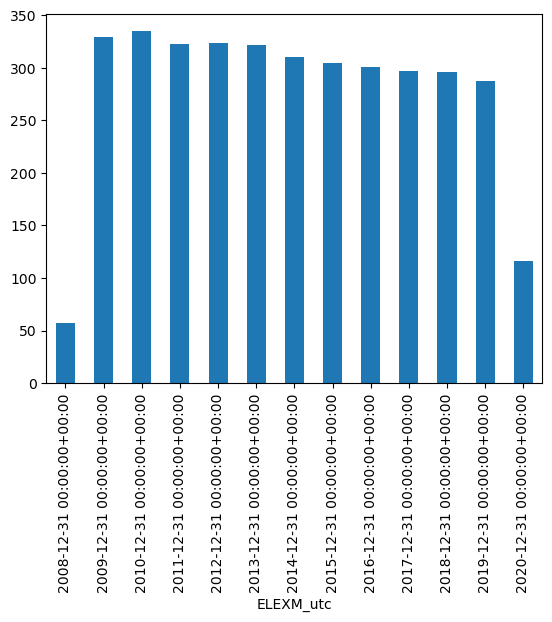

In [18]:
df["POWER_ESPENI_MW"].resample("h").mean().resample("y").sum().mul(1e-6).plot.bar()
df["POWER_ESPENI_MW"].resample("h").mean().resample("y").sum().mul(1e-6)

In [41]:
import pypsa

n = pypsa.Network(
    Path.cwd().parent / "resources" / "pypsa-fes" / "networks" / "elec_s_ec_lv1.5__bev-heat-ss_LW_2023.nc"
)

INFO:pypsa.io:Imported network elec_s_ec_lv1.5__bev-heat-ss_LW_2023.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [42]:
idx = n.loads.index[n.loads.index.str.contains("GB")]
model_demand = n.loads_t.p_set[idx].sum(axis=1)
model_demand.index = model_demand.index.tz_localize("UTC")

In [43]:
espeni_demand = df.loc[model_demand.index[0]:model_demand.index[-1]]["POWER_ESPENI_MW"]
espeni_demand = espeni_demand.resample("h").mean()

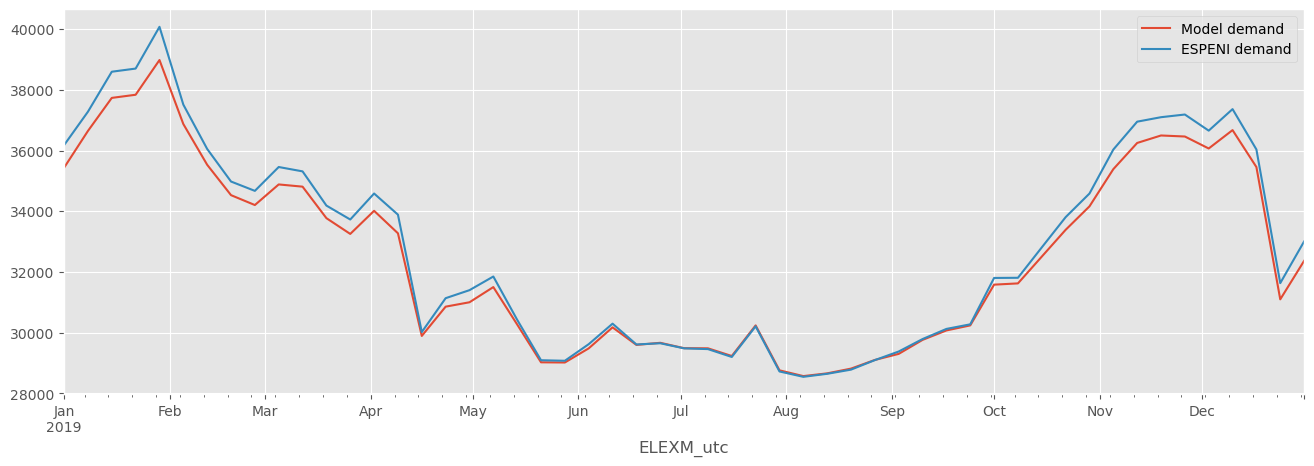

In [44]:
n = 500

from matplotlib import pyplot as plt
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(16, 5))

# model_demand.iloc[:n].plot(ax=ax, label="Model demand")
# espeni_demand.iloc[:n].plot(ax=ax, label="ESPENI demand")
model_demand.resample("7d").mean().plot(ax=ax, label="Model demand")
espeni_demand.resample("7d").mean().plot(ax=ax, label="ESPENI demand")

ax.legend()
plt.show()

In [34]:
import pypsa
from pathlib import Path


n = pypsa.Network(Path.cwd().parent / "resources" / "pypsa-fes" / "networks" / "elec_s_ec_lv1.5__bev-heat-ss_LW_2023.nc")

INFO:pypsa.io:Imported network elec_s_ec_lv1.5__bev-heat-ss_LW_2023.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [35]:
print(n.loads.carrier.unique())
# idx = n.loads.index[n.loads.carrier == "land transport EV"]
idx = n.loads.index[n.loads.carrier == ""]

['' 'heat demand' 'land transport EV']


Load,BE1 0,DE1 0,DK1 0,DK2 0,FR1 0,GB0 Z10,GB0 Z11,GB0 Z12,GB0 Z13,GB0 Z14,...,GB0 Z6,GB0 Z7,GB0 Z8,GB0 Z9,IE4 0,LU1 0,NI1 0,NL1 0,NO2 0,SE2 0
snapshot,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,8542.0,41483.866835,1806.430251,1379.609749,60306.535289,-45.008302,-329.125216,-212.489295,-207.451237,-402.278497,...,-16.788039,-98.540772,-187.427101,-300.015649,2980.0,510.597876,668.914680,11194.0,15622.94,14375.0
2019-01-01 01:00:00,8077.0,40024.615276,1740.677242,1329.392758,58544.941319,-46.330009,-338.079390,-219.841549,-214.382907,-414.983021,...,-17.266175,-101.065768,-191.922529,-308.516704,2823.0,461.443405,664.155945,10933.0,15705.29,14153.0
2019-01-01 02:00:00,7823.0,38809.903136,1681.779057,1284.410943,55148.941319,-45.877556,-336.299025,-219.657715,-213.470883,-417.274262,...,-17.289548,-100.408696,-190.365475,-307.067710,2595.0,459.155544,605.272611,10667.0,15643.08,13896.0
2019-01-01 03:00:00,7636.0,38733.047890,1663.233045,1270.246955,52982.865493,-48.133589,-354.862361,-232.941695,-226.357044,-441.808133,...,-18.508821,-106.321178,-200.175956,-323.139320,2456.0,453.086616,545.764392,10413.0,15611.87,13955.0
2019-01-01 04:00:00,7617.0,38520.448313,1667.292643,1273.347357,52588.953957,-58.856152,-436.553236,-287.656081,-279.047129,-537.191197,...,-22.997250,-131.565923,-244.735027,-395.490288,2376.0,459.597730,519.471181,10441.0,15727.78,14166.0


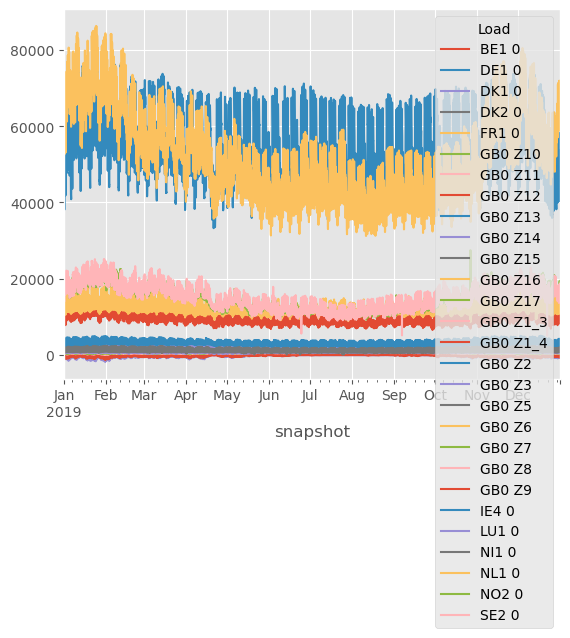

In [36]:
n.loads_t.p_set[idx].plot()
n.loads_t.p_set[idx].head()

In [13]:
import xarray as xr

heat = xr.open_dataset(Path.cwd().parent / "resources" / "pypsa-fes" / "heat_demand_total_elec_s_eso.nc")

<bound method Mapping.values of <xarray.Dataset>
Dimensions:      (time: 365, name: 31)
Coordinates:
  * time         (time) datetime64[ns] 2019-01-01 2019-01-02 ... 2019-12-31
  * name         (name) object 'GB0 Z7' 'GB0 Z6' 'GB0 Z5' ... 'SE2 0' 'NI1 0'
Data variables:
    heat_demand  (time, name) float64 ...>

In [14]:
heat.to_dataframe().head()

heat_demand
time       name                 
2019-01-01 GB0 Z7  465040.107097
           GB0 Z6   72149.247120
           GB0 Z5  473241.412258
           GB0 Z3  184236.800194
           GB0 Z2  145894.308505